# Here, we decide to learn tensorflow from a simple example directly!

## General writing flow
1. import required libraries
2. load data and do some data pre-processing
3. split your data into training and validation set
4. build the network
5. train the model and record/monitoring the performance

## 1. Import required libries and set some parameters 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 2. Load data and do some pre-processing
We use MNIST HERE (with sklearn 8x8 version rather than use tensorflow 28x28 version)

In [2]:
from sklearn.datasets import load_digits

train = pd.read_csv("train-3.csv")
test = pd.read_csv("test.csv")
testID = test['id']




## Drop Null Feature(s)

In [3]:
#df_all = pd.concat( [ train.drop( [ 'Id', 'SalePrice' ], axis = 1 ),
#                      test.drop( [ 'Id' ], axis = 1 ) ],
#                      axis = 0, ignore_index = False )
#train.drop_duplicates(keep='first', inplace=False) 
#test.drop_duplicates(keep='first', inplace=False) 
#train_data=train.drop('class', axis=1)
df_all = pd.concat([train, test], keys=['train', 'test'], sort=True)

In [4]:
#df_all.drop(['Id'], axis=1, inplace=True)
#df_all.drop(['id'], axis=1, inplace=True)
#df_all.drop(['city'],axis=1,inplace=True)
df_all.drop(['appearedHour'], axis=1, inplace=True)
df_all.drop(['appearedMinute'], axis=1, inplace=True)

In [5]:
# check null status
print( df_all.shape )
df_na = df_all.select_dtypes( exclude = [ 'object' ] ).isnull().sum()
print( df_na[ df_na > 100 ].sort_values(ascending=False) )

(8951, 182)
class    1791
dtype: int64


In [6]:
#train = train.drop( labels = train[ train['class'].isna().any() ].index, axis = 0 )

In [7]:
df_all['class'] = df_all['class'].apply(str)

In [8]:

#plt.plot(train['pressure'], train['class'], '.')
#plt.xlabel('pressure')
#plt.ylabel('class')
#print( train[ train['pressure'] ].SalePrice )

In [9]:




def FunctionalToInt(x):
    if(x==False):
        r = 0
    else:
        r = 1
    return r

df_all['closeToWater'] = df_all['closeToWater'].apply(FunctionalToInt)
df_all['urban'] = df_all['urban'].apply(FunctionalToInt)
df_all['suburban'] = df_all['suburban'].apply(FunctionalToInt)
df_all['midurban'] = df_all['midurban'].apply(FunctionalToInt)
df_all['rural'] = df_all['rural'].apply(FunctionalToInt)
df_all['gymIn100m'] = df_all['gymIn100m'].apply(FunctionalToInt)
df_all['gymIn250m'] = df_all['gymIn250m'].apply(FunctionalToInt)
df_all['gymIn500m'] = df_all['gymIn500m'].apply(FunctionalToInt)
df_all['gymIn1000m'] = df_all['gymIn1000m'].apply(FunctionalToInt)
df_all['gymIn2500m'] = df_all['gymIn2500m'].apply(FunctionalToInt)
df_all['gymIn5000m'] = df_all['gymIn5000m'].apply(FunctionalToInt)
df_all['pokestopIn100m'] = df_all['pokestopIn100m'].apply(FunctionalToInt)
df_all['pokestopIn250m'] = df_all['pokestopIn250m'].apply(FunctionalToInt)
df_all['pokestopIn500m'] = df_all['pokestopIn500m'].apply(FunctionalToInt)
df_all['pokestopIn1000m'] = df_all['pokestopIn1000m'].apply(FunctionalToInt)

df_all['pokestopIn2500m'] = df_all['pokestopIn2500m'].apply(FunctionalToInt)
df_all['pokestopIn5000m'] = df_all['pokestopIn5000m'].apply(FunctionalToInt)


for num in range(1,152):
    df_all['cooc_'+str(num)] = df_all['cooc_'+str(num)].apply(FunctionalToInt)



def FunctionalToDay(x):
    if(x=='morning'):
        r = 0
    elif(x=='afternoon'):
        r = 1
    elif(x=='evening'):
        r = 2
    elif(x=='night'):
        r = 3
    else:
        r = 4
    return r

df_all['appearedTimeOfDay'] = df_all['appearedTimeOfDay'].apply(FunctionalToDay)


def FunctionalToWeather(x):
    if(x=='Clear'):
        r = 0
    elif(x=='PartlyCloudy'):
        r = 1
    elif(x=='Overcast'):
        r = 2
    elif(x=='MostlyCloudy'):
        r = 3
    elif(x=='PartlyCloudy'):
        r = 4
    elif(x=='BreezyandPartlyCloudy'):
        r = 5
    elif(x=='Dry'):
        r = 6
    elif(x=='LightRain'):
        r = 7
    elif(x=='Rain'):
        r = 8
    else:
        r = 9
    return r

df_all['weather'] = df_all['weather'].apply(FunctionalToWeather)



def FunctionalToDay(x):
    if(x=='morning'):
        r = 0
    elif(x=='afternoon'):
        r = 1
    elif(x=='evening'):
        r = 2
    elif(x=='night'):
        r = 3
    else:
        r = 4
    return r

df_all['weatherIcon'] = df_all['weather'].apply(FunctionalToWeather)


def FunctionalToClss(x):
    #print(x)
    if(x=='0.0'):
        r = '0'
    elif(x=='1.0'):
        r = '1'
    elif(x=='2.0'):
        r = '2'
    elif(x=='3.0'):
        r = '3'
    elif(x=='4.0'):
        r = '4'
    elif(x=='5.0'):
        r = '5'
    elif(x=='6.0'):
        r = '6'
    else:
        r = '7'
    return r

#df_all['class'] = df_all['class'].apply(FunctionalToClss)

def FunctionalToLocation(x):
    if(x=='Asia'):
        r = 0
    elif(x=='America'):
        r = 1
    elif(x=='America/Argentina'):
        r = 2
    elif(x=='Europe'):
        r = 3
    elif(x=='Pacific'):
        r = 4
    elif(x=='Africa'):
        r = 5
    else:
        r = 6
    return r

df_all['continent'] = df_all['continent'].apply(FunctionalToLocation)

def FunctionalToDensity(x):
    if(x>=10000):
        r = 0
    elif(x>=9000):
        r = 1
    elif(x>=8000):
        r = 2
    elif(x>=7000):
        r = 3
    elif(x>=6000):
        r = 4
    elif(x>=5000):
        r = 5
    elif(x>=4000):
        r = 6
    elif(x>=3000):
        r = 7
    elif(x>=2000):
        r = 8
    else:
        r = 9
    return r

#df_all['population_density'].apply(FunctionalToDensity)

def FunctionalToPressure(x):
    if(x>=1035):
        r = 0
    elif(x>=1030):
        r = 1
    elif(x>=1025):
        r = 2
    elif(x>=1020):
        r = 3
    elif(x>=1015):
        r = 4
    elif(x>=1010):
        r = 5
    elif(x>=1005):
        r = 6
    elif(x>=1000):
        r = 7
    else:
        r = 8
    return r
#df_all['pressure'].apply(FunctionalToPressure)

df_all.drop(['population_density'], axis=1, inplace=True)


df_all.drop(['pressure'], axis=1, inplace=True)
	


In [10]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8951 entries, (train, 0) to (test, 1790)
Columns: 180 entries, appearedTimeOfDay to windSpeed
dtypes: float64(4), int64(173), object(3)
memory usage: 12.4+ MB


In [11]:
# 一些右偏分佈的 feature，可透過取 log 將其轉為常態分佈
#df_all['class']

In [12]:
df_all.drop(['id'], axis=1, inplace=True)
df_all.drop(['class'], axis=1, inplace=True)
df_all_dum = pd.get_dummies(df_all); df_all_dum.head()
df_all_dum.head()

appearedTimeOfDay  closeToWater  continent  cooc_1  cooc_10  \
train 0                  2             0          0       0        1   
      1                  3             1          1       0        0   
      2                  2             1          1       0        0   
      3                  0             1          6       0        0   
      4                  2             1          1       0        0   

         cooc_100  cooc_101  cooc_102  cooc_103  cooc_104     ...       \
train 0         0         0         0         0         0     ...        
      1         0         0         0         0         0     ...        
      2         0         0         0         0         0     ...        
      3         0         0         0         0         0     ...        
      4         0         0         0         0         0     ...        

         city_Tokyo  city_Toronto  city_Tripoli  city_Tunis  city_Vancouver  \
train 0           0             0             0           0               0   
      1           0             0             0           0               0   
      2           0             0             0           0               0   
      3           0             0             0           0               0   
      4           0             0             0           0               0   

         city_Vienna  city_Vilnius  city_Warsaw  city_Zagreb  city_Zurich  
train 0            0             0            0            0            0  
      1            0             0            0            0            0  
      2            0             0            0            0            0  
      3            0             0            0            0            0  
      4            0             0            0            0            0  

[5 rows x 252 columns]

In [13]:
#df_all['population_density']

In [14]:
# min-max normalization
#x_ = x_ / x_.max() 
# 將NA的值填平均值
df_all_dum = df_all_dum.fillna( df_all_dum.mean() ); df_all_dum.head()
# one hot encoding

appearedTimeOfDay  closeToWater  continent  cooc_1  cooc_10  \
train 0                  2             0          0       0        1   
      1                  3             1          1       0        0   
      2                  2             1          1       0        0   
      3                  0             1          6       0        0   
      4                  2             1          1       0        0   

         cooc_100  cooc_101  cooc_102  cooc_103  cooc_104     ...       \
train 0         0         0         0         0         0     ...        
      1         0         0         0         0         0     ...        
      2         0         0         0         0         0     ...        
      3         0         0         0         0         0     ...        
      4         0         0         0         0         0     ...        

         city_Tokyo  city_Toronto  city_Tripoli  city_Tunis  city_Vancouver  \
train 0           0             0             0           0               0   
      1           0             0             0           0               0   
      2           0             0             0           0               0   
      3           0             0             0           0               0   
      4           0             0             0           0               0   

         city_Vienna  city_Vilnius  city_Warsaw  city_Zagreb  city_Zurich  
train 0            0             0            0            0            0  
      1            0             0            0            0            0  
      2            0             0            0            0            0  
      3            0             0            0            0            0  
      4            0             0            0            0            0  

[5 rows x 252 columns]

## Training Start

In [15]:
# inputs
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
#x_ = df_all_dum[:train.shape[0]].values
#y_ = train['class'].values


#X_test = df_all_dum[ train.shape[0]: ]

X_train_temp=df_all_dum[:train.shape[0]]



X = X_train_temp.values
y = train['class'].values
#把train data與test分開
#X, X_val, y, y_val = train_test_split(X, y, test_size = 0.1, random_state = 40)





In [16]:
#train['class'].isna

In [17]:

# setting hyperparameter
batch_size = 128
epochs = 800
#lr = 0.8
train_ratio = 0.9

In [18]:
# min-max normalization
X = X / X.max() 
#f_all_dum.dtypes
X.shape

(7160, 252)

In [19]:
#X_test = df_all_dum[ train.shape[0]: ]
#y_one_hot=y_

y_one_hot = np.zeros((len(y), 10))  
y_one_hot[np.arange(len(y)), y] = 1

In [20]:
y_one_hot.shape

(7160, 10)

## 3. Split your data into training and validation sets

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y_one_hot, 
                                                    test_size=0.05, 
                                                    stratify=y)

In [22]:
from tensorflow.keras.layers import Dense, Dropout, Activation,BatchNormalization

In [23]:
model = tf.keras.Sequential()
model.add(Dense(128, activation='relu',  input_shape=(252,)))
#model.add(BatchNormalization())
#model.add(Dense(128, input_dim = 784, activation= "relu"))
#model.add(Dropout(0.25))
model.add(Dense(64, activation = "relu"))

#model.add(Dense(32, activation = "relu"))
#model.add((0.5))
#model.add(Dense(64, activation='relu', input_dim=20))
#model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) 
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               32384     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 41,290
Trainable params: 41,290
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
from keras.optimizers import SGD
opt = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

Using TensorFlow backend.


In [25]:
from tensorflow.keras.layers import Dense

In [26]:
model_history = model.fit(x=x_train, y=y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_split=1 - train_ratio)

Train on 6121 samples, validate on 681 samples
Epoch 1/800
6121/6121 [==============================] - 1s 93us/step - loss: 2.1878 - acc: 0.2021 - val_loss: 1.9882 - val_acc: 0.2115
Epoch 2/800
6121/6121 [==============================] - 0s 22us/step - loss: 1.8554 - acc: 0.2199 - val_loss: 1.7766 - val_acc: 0.2188
Epoch 3/800
6121/6121 [==============================] - 0s 23us/step - loss: 1.7727 - acc: 0.2191 - val_loss: 1.7602 - val_acc: 0.2188
Epoch 4/800
6121/6121 [==============================] - 0s 21us/step - loss: 1.7641 - acc: 0.2258 - val_loss: 1.7533 - val_acc: 0.2188
Epoch 5/800
6121/6121 [==============================] - 0s 24us/step - loss: 1.7633 - acc: 0.2171 - val_loss: 1.7534 - val_acc: 0.2188
Epoch 6/800
6121/6121 [==============================] - 0s 24us/step - loss: 1.7607 - acc: 0.2256 - val_loss: 1.7534 - val_acc: 0.2188
Epoch 7/800
6121/6121 [==============================] - 0s 23us/step - loss: 1.7607 - acc: 0.2202 - val_loss: 1.7492 - val_acc: 0.2188
E

## Training Start

In [27]:
train_loss = model_history.history['loss']
train_acc = model_history.history['acc']
valid_loss = model_history.history['val_loss']
valid_acc = model_history.history['val_acc']

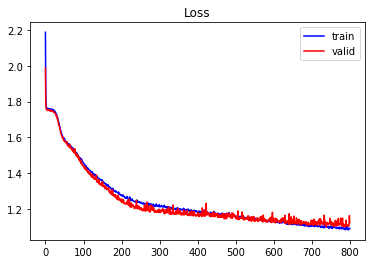

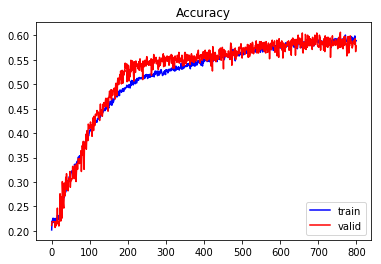

In [28]:
plt.plot(train_loss, 'b', label='train')
plt.plot(valid_loss, 'r', label='valid')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(train_acc, 'b', label='train')
plt.plot(valid_acc, 'r', label='valid')
plt.legend(loc=4)
plt.title("Accuracy")
plt.show()

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
y_predict = model.predict_classes(x_test)
y_test_label = np.argmax(y_test, axis=1)

In [31]:
print('Accuracy in testing data:', accuracy_score(y_test_label, y_predict))

Accuracy in testing data: 0.5446927374301676


In [32]:
y_predict

array([2, 4, 0, 5, 4, 3, 2, 2, 0, 0, 5, 4, 2, 0, 3, 2, 2, 5, 0, 5, 1, 5,
       2, 5, 4, 5, 2, 2, 2, 1, 1, 2, 5, 1, 3, 3, 4, 5, 0, 4, 5, 0, 0, 5,
       0, 4, 1, 0, 2, 5, 4, 2, 4, 5, 5, 5, 3, 5, 2, 2, 0, 3, 5, 2, 0, 4,
       1, 3, 5, 0, 0, 0, 4, 2, 0, 0, 2, 3, 5, 5, 0, 1, 1, 4, 0, 0, 5, 1,
       4, 1, 4, 0, 2, 5, 5, 1, 0, 4, 5, 4, 1, 2, 5, 0, 0, 4, 2, 0, 5, 5,
       5, 4, 0, 4, 2, 1, 0, 1, 3, 4, 4, 3, 5, 2, 2, 5, 0, 4, 5, 0, 0, 0,
       0, 0, 5, 0, 4, 4, 2, 2, 0, 0, 2, 5, 4, 4, 2, 5, 0, 5, 4, 3, 5, 0,
       5, 0, 5, 0, 0, 3, 5, 0, 1, 4, 5, 5, 5, 1, 1, 4, 1, 5, 5, 5, 0, 0,
       0, 0, 0, 5, 1, 4, 4, 0, 1, 0, 5, 0, 0, 0, 3, 5, 2, 4, 0, 3, 0, 0,
       0, 2, 5, 0, 0, 5, 5, 0, 1, 4, 3, 3, 1, 5, 2, 4, 0, 2, 5, 0, 5, 1,
       0, 2, 4, 0, 0, 1, 0, 4, 0, 4, 1, 3, 2, 4, 1, 1, 3, 4, 4, 1, 1, 5,
       0, 1, 4, 1, 4, 0, 1, 0, 5, 2, 0, 5, 5, 0, 2, 4, 4, 0, 3, 5, 3, 4,
       5, 3, 4, 0, 0, 0, 3, 5, 3, 0, 0, 1, 5, 0, 1, 2, 1, 5, 5, 1, 3, 1,
       0, 5, 0, 4, 0, 5, 2, 5, 4, 5, 0, 1, 1, 5, 4,

In [33]:
#tf.global_variables()

In [34]:
# save model
model.save('my_model_v1.h5')

# load model
another_model = tf.keras.models.load_model('my_model_v1.h5')

In [35]:
test.head()

,id,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,...,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151
0,MTA5MTEwOTYxMzM0NzA2NDEzNzM=,morning,8,26,13,False,Ljubljana,Europe,MostlyCloudy,16.8,...,False,False,False,False,False,False,False,False,False,False
1,MTY0OTUyMTM2MDExMjg3MjczMjU=,night,2,35,13,True,Los_Angeles,America,PartlyCloudy,18.6,...,False,False,False,False,False,True,False,False,False,False
2,MTQ0ODU1OTEzOTU1NTAyNzI4NjE=,night,0,5,0,True,New_York,America,PartlyCloudy,30.0,...,False,False,False,False,False,False,False,False,False,False
3,MTY1ODg1MzEwNzYzNDUzMDUwNTM=,morning,7,38,13,True,London,Europe,MostlyCloudy,18.5,...,False,False,False,False,False,False,False,False,False,False
4,MTY0NTg2OTA5MTkzOTE2MTc1MTc=,night,1,27,12,False,Chicago,America,Clear,20.2,...,False,False,False,False,False,False,False,False,False,False


In [36]:
X_test_temp = df_all_dum[ train.shape[0]: ]
#X_test_temp.shape
#Y_test = train['class']

In [37]:
#Y_test.shape
#y_one_hot_test = np.zeros((len(Y_test), 10))  
#y_one_hot_test[np.arange(len(Y_test)), Y_test] = 1

In [38]:
#X_test_temp.id


In [39]:
#X_test_temp

In [40]:
X_test=X_test_temp.values
y_predict = another_model.predict_classes(X_test)
#y_test_label = np.argmax(Y_test.values, axis=1)
#print('Accuracy in testing data:', accuracy_score(y_test_label, y_predict))
y_predict.shape

(1791,)

In [41]:
#y_test_label = np.argmax(Y_test, axis=1)
#print('Accuracy in testing data:', accuracy_score(y_test_label, y_predict))

In [42]:
X_test

array([[0., 0., 3., ..., 0., 0., 0.],
       [3., 1., 1., ..., 0., 0., 0.],
       [3., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 3., ..., 0., 0., 0.],
       [1., 0., 3., ..., 0., 0., 0.],
       [1., 1., 3., ..., 0., 0., 0.]])

In [43]:
X_test_temp = df_all_dum[ train.shape[0]: ]
pd.DataFrame({'class': y_predict} ,index = testID).to_csv('pokemon_submission.csv') 

# Practice
Build a cat-dog-classifier with tf.keras